# Jarný  CyberSecurityDay 2023

## Workshop č. 2: Klasifikácia malvéru pomocou neurónových sietí
- Klasifikácia malvéru pomáha analytikovi pochopiť správanie škodlivých súborov.
- V rámci workshopu sa pozrieme na spôsoby, ako získať ohodnotený dataset.
- Ukážeme viaceré možnosti vizuálnej reprezentácie a návrhy modelov neorónových sietí pre tento klasifikačný problém.

### Pozrime sa na vzorky z nášho datasetu

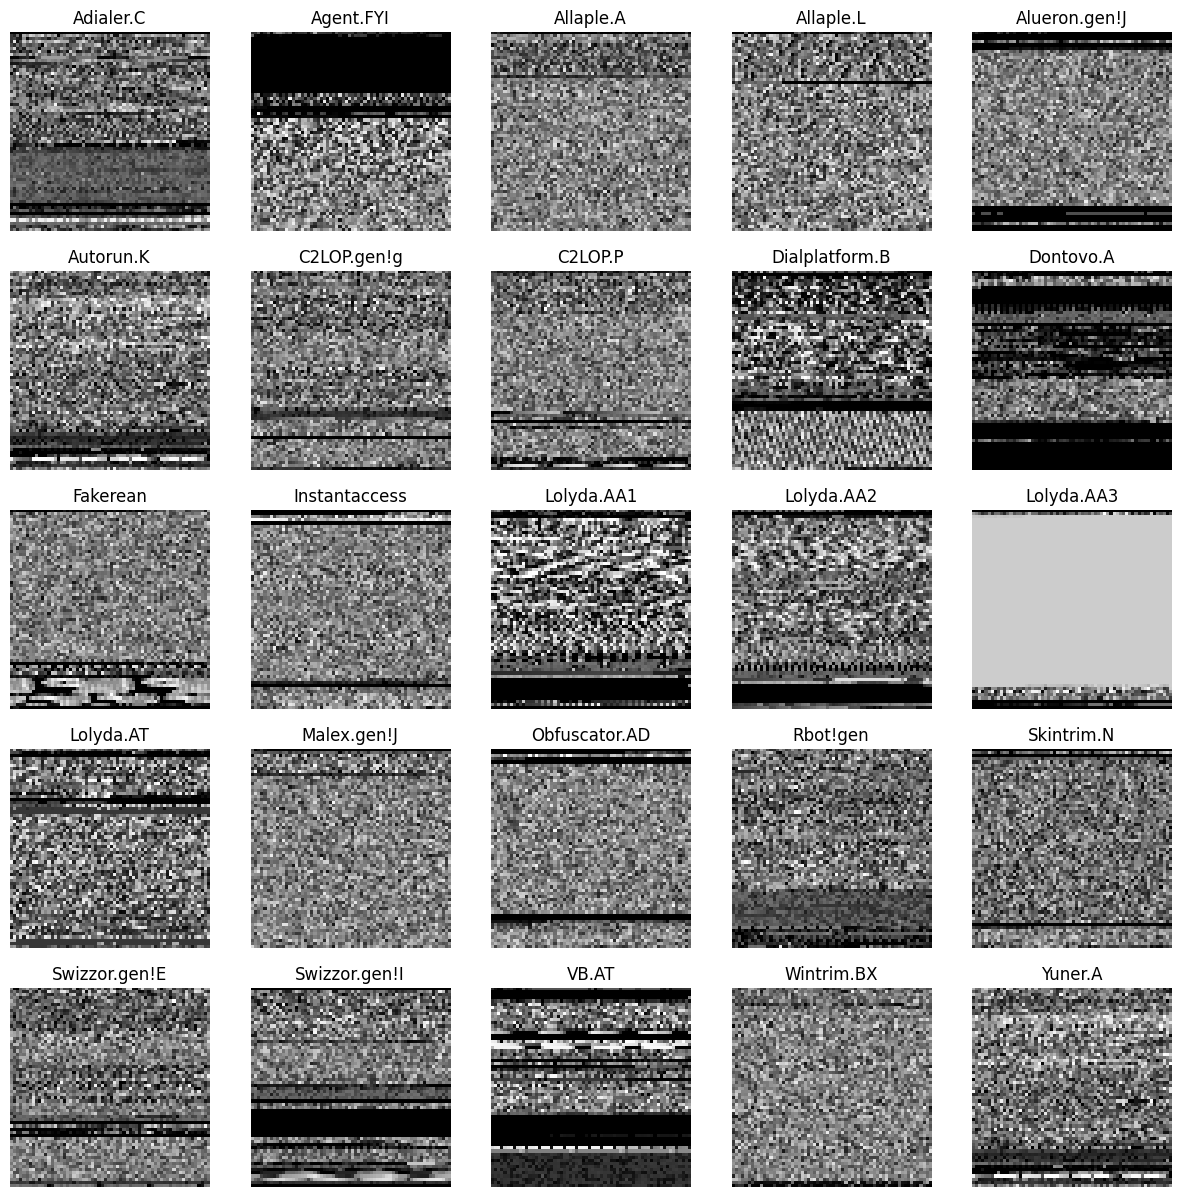

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i, clas in enumerate(os.listdir('malimg_paper_dataset_imgs')):
    path = 'malimg_paper_dataset_imgs/' + clas + '/' + os.listdir('malimg_paper_dataset_imgs/' + clas)[0]
    plt.subplot(5,5,i+1)
    plt.gca().set_title(clas)
    plt.axis('off')
    image = cv2.resize(cv2.imread(path, 0), (64 , 64 )).reshape((64,64,1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [4]:
import os
classes = os.listdir('malimg_paper_dataset_imgs')
temp_paths=[]
temp_labels=[]
for clas in classes:
    actual_paths = []
    actual_labels = []
    for path in os.listdir('malimg_paper_dataset_imgs/' + clas):
        if path != '.ipynb_checkpoints':
            actual_paths.append('malimg_paper_dataset_imgs/' + clas + '/' + path)
    temp_paths.append(actual_paths)
    temp_labels.append(classes.index(clas))

In [5]:
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.gen!g',
 'C2LOP.P',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [6]:
temp_paths

[['malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png',
  'malimg_paper_dataset_imgs/Adialer.C/000e30a0819ac7ed931d629ce2ef8948.png',
  'malimg_paper_dataset_imgs/Adialer.C/002f06eff1d222560939be72583d6ae9.png',
  'malimg_paper_dataset_imgs/Adialer.C/0044f0746b812f6b454ce210bc58c572.png',
  'malimg_paper_dataset_imgs/Adialer.C/0046a83d932a3d431eb21a99b46d6af7.png',
  'malimg_paper_dataset_imgs/Adialer.C/004935acac9e9afc9ffbddb20d5460d4.png',
  'malimg_paper_dataset_imgs/Adialer.C/008a92e720e896caea4a251e6a4c9934.png',
  'malimg_paper_dataset_imgs/Adialer.C/008cadcfa4ca85c4a4aaf901a70868cc.png',
  'malimg_paper_dataset_imgs/Adialer.C/009a2962fe18980a12e5b2d6208dc478.png',
  'malimg_paper_dataset_imgs/Adialer.C/00bb6b6a7be5402fcfce453630bfff19.png',
  'malimg_paper_dataset_imgs/Adialer.C/00c547ba11531d9357488cf1034fee3b.png',
  'malimg_paper_dataset_imgs/Adialer.C/00e10bb5c7467e2e52ec9505dd4c8e95.png',
  'malimg_paper_dataset_imgs/Adialer.C/00f505d965636db4d021f6974

In [7]:
summary = 0
for i in range(len(classes)):
    summary += len(temp_paths[i])
    print(f'Počet vzoriek v triede {str(classes[i])} : {str(len(temp_paths[i]))}')
#     print(str(classes[i]) )
print(f'Počet všetkých vzoriek : {summary}')
print(f'Počet tried : {len(classes)}')

Počet vzoriek v triede Adialer.C : 122
Počet vzoriek v triede Agent.FYI : 116
Počet vzoriek v triede Allaple.A : 2587
Počet vzoriek v triede Allaple.L : 1591
Počet vzoriek v triede Alueron.gen!J : 198
Počet vzoriek v triede Autorun.K : 106
Počet vzoriek v triede C2LOP.gen!g : 200
Počet vzoriek v triede C2LOP.P : 146
Počet vzoriek v triede Dialplatform.B : 177
Počet vzoriek v triede Dontovo.A : 162
Počet vzoriek v triede Fakerean : 381
Počet vzoriek v triede Instantaccess : 431
Počet vzoriek v triede Lolyda.AA1 : 213
Počet vzoriek v triede Lolyda.AA2 : 184
Počet vzoriek v triede Lolyda.AA3 : 123
Počet vzoriek v triede Lolyda.AT : 159
Počet vzoriek v triede Malex.gen!J : 136
Počet vzoriek v triede Obfuscator.AD : 142
Počet vzoriek v triede Rbot!gen : 158
Počet vzoriek v triede Skintrim.N : 80
Počet vzoriek v triede Swizzor.gen!E : 128
Počet vzoriek v triede Swizzor.gen!I : 132
Počet vzoriek v triede VB.AT : 408
Počet vzoriek v triede Wintrim.BX : 97
Počet vzoriek v triede Yuner.A : 800
P

### Rozdeľme si dataset na trénovaciu, testovaciu a validačnú sadu

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

indexes = []
paths_train = []
labels_train = []
paths_test = []
labels_test = []
paths_valid = []
labels_valid = []
counter = 0
for chunk in temp_paths:
    indexy = np.random.choice(len(chunk),int(len(chunk)),replace=False)
    #     print(len(indexy))
    idx_train = indexy[:int(len(indexy)*0.70)]
    idx_test = indexy[int(len(indexy)*0.70):int(len(indexy)*0.85)]
    idx_valid= indexy[int(len(indexy)*0.85):]
    chunk = np.array(chunk)
    #     print(len(chunk))
    now_paths_train = np.array(chunk[idx_train])
    now_paths_test = np.array(chunk[idx_test])
    now_paths_valid = np.array(chunk[idx_valid])
    for path in now_paths_train:
        paths_train.append(path)
        labels_train.append(counter)
    for path in now_paths_test:
        paths_test.append(path)
        labels_test.append(counter)
    for path in now_paths_valid:
        paths_valid.append(path)
        labels_valid.append(counter)
    counter+=1


print(len(temp_paths))

from sklearn.utils import shuffle

paths_train, labels_train = shuffle(paths_train, labels_train, random_state=0)
paths_test, labels_test = shuffle(paths_test, labels_test, random_state=0)

paths_valid, labels_valid = shuffle(paths_valid, labels_valid, random_state=0)

print("velkost trenovacej mnoziny: ",len(paths_train))
print("velkost testovacej mnoziny: ",len(paths_test))
print("velkost validačnej mnoziny: ",len(paths_valid))
print(len(paths_train)+len(paths_test)+len(paths_valid))

25
velkost trenovacej mnoziny:  6273
velkost testovacej mnoziny:  1347
velkost validačnej mnoziny:  1357
8977


#### Ukážka trénovacej sady

In [9]:
import pandas as pd
df = pd.DataFrame()
df['paths_train'] = paths_train
df['labels_train'] = labels_train
df

,paths_train,labels_train
0,malimg_paper_dataset_imgs/Allaple.A/0038bcd98e...,2
1,malimg_paper_dataset_imgs/Swizzor.gen!I/06e3c5...,21
2,malimg_paper_dataset_imgs/Allaple.A/059748c821...,2
3,malimg_paper_dataset_imgs/Lolyda.AA2/009738b06...,13
4,malimg_paper_dataset_imgs/Allaple.L/0389fb00d7...,3
...,...,...
6268,malimg_paper_dataset_imgs/Obfuscator.AD/00b8b4...,17
6269,malimg_paper_dataset_imgs/Autorun.K/01d3dd5cd0...,5
6270,malimg_paper_dataset_imgs/Allaple.A/00ae7180e1...,2
6271,malimg_paper_dataset_imgs/Allaple.L/08acb43e2f...,3


#### Príprava generátora

In [10]:
import cv2
import math
import tensorflow as tf

In [11]:
class Generator(tf.keras.utils.Sequence ):

    def __init__(self, paths, labels, batch_size):
        self.paths, self.labels, self.batch_size = paths, labels, batch_size


    def __len__(self):
        return math.ceil(len(self.paths) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.paths[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx + 1) * self.batch_size]


        batch_x = [cv2.resize(cv2.imread(x, 0), (64 , 64 )).reshape((64,64,1)) for x in batch_x]
        batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=len(classes))



        return np.array(batch_x), np.array(batch_y)



train_gen = Generator(paths_train, labels_train, 32)
test_gen = Generator(paths_test, labels_test, 32)
valid_gen = Generator(paths_valid, labels_valid, 32)
print('done')

done


#### Príprava neurónovej čo?

In [12]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64,64,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))


print('done')

done


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf.keras.utils.plot_model(model)
print('done')

done


In [14]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="models-cnn-malimg/future.hdf5",
    #     save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#### Trénovanie modelu

In [15]:
history = model.fit(train_gen, validation_data=valid_gen, epochs=5, verbose=1, use_multiprocessing=False, workers=12,callbacks=[model_checkpoint_callback])
print('done')

Epoch 1/5
197/197 [==============================] - 7s 21ms/step - loss: 3.3381 - accuracy: 0.7508 - val_loss: 0.3599 - val_accuracy: 0.9049
Epoch 2/5
197/197 [==============================] - 4s 18ms/step - loss: 0.2610 - accuracy: 0.9303 - val_loss: 0.3032 - val_accuracy: 0.9094
Epoch 3/5
197/197 [==============================] - 4s 18ms/step - loss: 0.1743 - accuracy: 0.9460 - val_loss: 0.2515 - val_accuracy: 0.9322
Epoch 4/5
197/197 [==============================] - 3s 17ms/step - loss: 0.2844 - accuracy: 0.9270 - val_loss: 0.2972 - val_accuracy: 0.9285
Epoch 5/5
197/197 [==============================] - 4s 18ms/step - loss: 0.1514 - accuracy: 0.9555 - val_loss: 0.2032 - val_accuracy: 0.9440
done


#### História trénovania

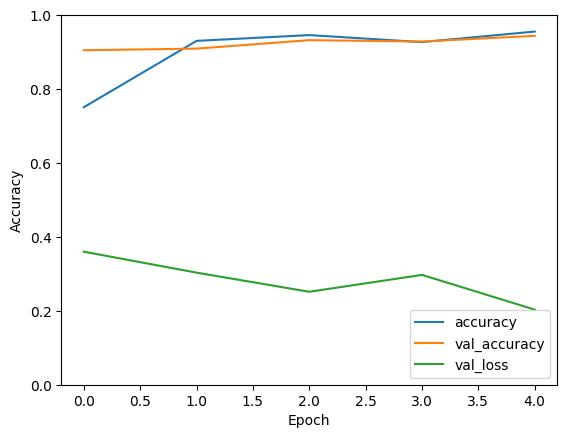

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

#### Načítanie najlepšie natrénovaného modelu a pozorovanie na testovacej sade

In [17]:
new_model = tf.keras.models.load_model('models-cnn-malimg/future.hdf5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

In [19]:
print("Evaluate on test data")
results = new_model.evaluate(test_gen, batch_size=len(classes))
print("test loss, test acc:", results)

Evaluate on test data
43/43 [==============================] - 2s 47ms/step - loss: 0.1808 - accuracy: 0.9488
test loss, test acc: [0.18078497052192688, 0.948775053024292]


In [20]:
print("Generate predictions")
predictions = new_model.predict(test_gen, batch_size=32)
print("predictions shape:", predictions.shape)

Generate predictions
43/43 [==============================] - 2s 47ms/step
predictions shape: (1347, 25)


In [21]:
predictions
values = np.argmax(predictions, axis=1)
values

array([24,  2, 24, ..., 23,  3, 14], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(labels_test, values, target_names=classes))

                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        18
     Agent.FYI       1.00      1.00      1.00        17
     Allaple.A       0.98      0.97      0.98       388
     Allaple.L       0.98      0.98      0.98       239
 Alueron.gen!J       1.00      0.93      0.97        30
     Autorun.K       0.00      0.00      0.00        16
   C2LOP.gen!g       0.77      0.77      0.77        30
       C2LOP.P       0.83      0.68      0.75        22
Dialplatform.B       1.00      1.00      1.00        27
     Dontovo.A       1.00      1.00      1.00        24
      Fakerean       1.00      0.98      0.99        57
 Instantaccess       1.00      1.00      1.00        65
    Lolyda.AA1       0.97      0.91      0.94        32
    Lolyda.AA2       1.00      1.00      1.00        28
    Lolyda.AA3       0.90      1.00      0.95        18
     Lolyda.AT       0.96      0.96      0.96        24
   Malex.gen!J       0.89      0.85      0.87  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Adialer.C'),
  Text(1, 0, 'Agent.FYI'),
  Text(2, 0, 'Allaple.A'),
  Text(3, 0, 'Allaple.L'),
  Text(4, 0, 'Alueron.gen!J'),
  Text(5, 0, 'Autorun.K'),
  Text(6, 0, 'C2LOP.gen!g'),
  Text(7, 0, 'C2LOP.P'),
  Text(8, 0, 'Dialplatform.B'),
  Text(9, 0, 'Dontovo.A'),
  Text(10, 0, 'Fakerean'),
  Text(11, 0, 'Instantaccess'),
  Text(12, 0, 'Lolyda.AA1'),
  Text(13, 0, 'Lolyda.AA2'),
  Text(14, 0, 'Lolyda.AA3'),
  Text(15, 0, 'Lolyda.AT'),
  Text(16, 0, 'Malex.gen!J'),
  Text(17, 0, 'Obfuscator.AD'),
  Text(18, 0, 'Rbot!gen'),
  Text(19, 0, 'Skintrim.N'),
  Text(20, 0, 'Swizzor.gen!E'),
  Text(21, 0, 'Swizzor.gen!I'),
  Text(22, 0, 'VB.AT'),
  Text(23, 0, 'Wintrim.BX'),
  Text(24, 0, 'Yuner.A')])

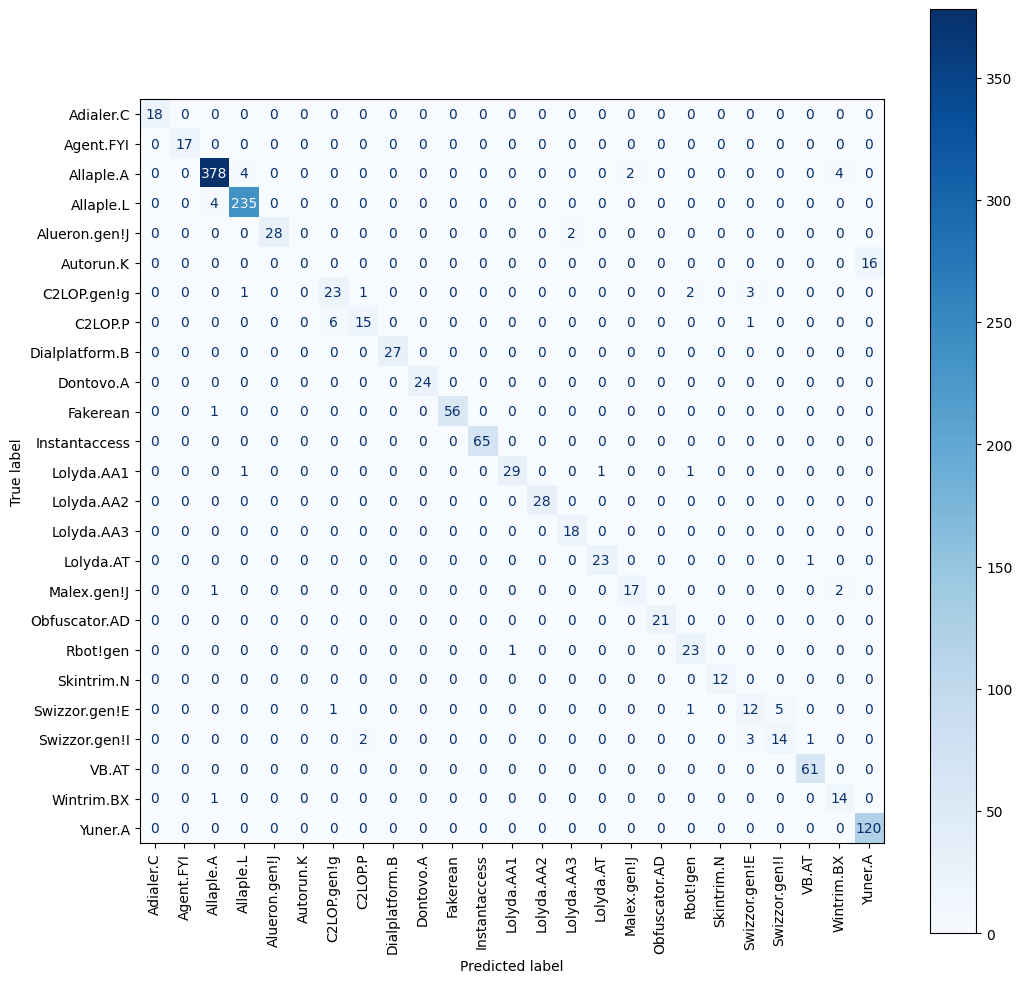

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100
cm = confusion_matrix(labels_test, values) # , normalize='true'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)